<a href="https://colab.research.google.com/github/johanik/ML_study/blob/main/BDA712_00_Lab03_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Session \# 03


---


by Josué Obregón <br>
BDA712-00 - Machine Learning Programming <br>
Department of Big Data Analytics - Kyung Hee University<br>

## Objective

The objective of this session is to start playing around with the concept of linear regression. We will program a simple linear regression to help Roberto with his pizza business.


# Getting the data

In [ ]:
import gdown

In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
urls = ['https://drive.google.com/uc?export=download&id=1Hqv36-YZKOMJwoAy__LERnrC9mzFNT6G', # pizza.txt  https://drive.google.com/file/d/1Hqv36-YZKOMJwoAy__LERnrC9mzFNT6G/view?usp=sharing       
      ]
outputs = ['pizza.txt']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Hqv36-YZKOMJwoAy__LERnrC9mzFNT6G
To: /content/data/pizza.txt
100%|██████████| 232/232 [00:00<00:00, 266kB/s]


# Making sense of the data

If we glance at Roberto’s examples, it seems that the reservations and pizzas are correlated. 

Let's import the file into a numpy array and take a peek on the data...

In [ ]:
import numpy as np

In [ ]:
data = np.genfromtxt('data/pizza.txt', delimiter=',', skip_header=1)

In [ ]:
data.shape

(30, 2)

In [ ]:
X, Y = data[:, 0], data[:,1]

In [ ]:
X.shape  # number of reservations

(30,)

In [ ]:
Y.shape  # number of pizzas

(30,)

In [ ]:
X[:5]

array([13.,  2., 14., 23., 13.])

In [ ]:
Y[:5]

array([33., 16., 32., 51., 27.])

The numbers are consistent with Roberto’s file, but it’s still hard to make
sense of them. Plot them on a chart, though, and they become clear:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Number of pizzas')

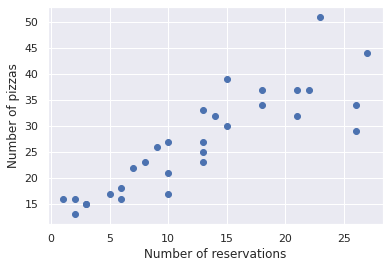

In [ ]:
sns.set()
plt.figure()
plt.scatter(X,Y)
plt.xlabel('Number of reservations')
plt.ylabel('Number of pizzas')

Is there a clear relationship between $X$ and $Y$?

# Coding Linear Regression

---
* So to recap our goal: we want to write a program that calculates the number of
pizzas from the number of reservations. 
* In other words, make predictions of $Y$ at new points $X = x$.

So that program should follow the following approach:

* During the `training phase`, the program approximates the data with a function
* Then, during the `prediction phase`, it should use that function to infer the number of pizzas.

---

More formally:


We want to use the observed data to construct a predictor $\hat{f}(x)$ that is
a good estimate of the regression function $f(x) = E(Y  | X = x)$.


In the general case, finding a function $\hat{f}(x)$ that approximates the data could be a lot of work. In our specific case, however, we lucked out. Our data points are roughly aligned, so we can approximate them with an especially simple function:



> **a line**



Let's try to plot a nice line that passes throuh the origin of the axes and seems to follow those points.

Hint: let's use the slope-intercept line equation: $y = mx + b$

Text(0, 0.5, 'number of pizzas')

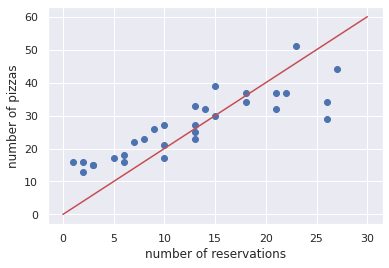

In [ ]:
# b=0, since its go through origin
# x=15, y=30
#m  dy/dx = 30/15 = 2
m=2
x_line = np.linspace(0,30, 100)
y_line = m * x_line

plt.figure()
plt.scatter(X,Y)
plt.plot(x_line, y_line, 'r')
plt.xlabel('number of reservations')
plt.ylabel('number of pizzas')


Let's try with different slopes.

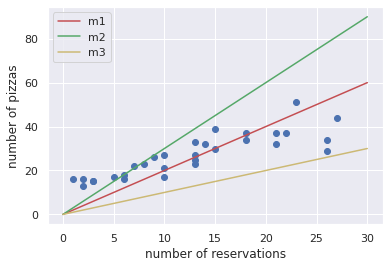

In [ ]:
m = 2
m2 = 3
m3 = 1
x_line = np.linspace(0,30, 100)

y_line = m * x_line
y_line2 = m2 * x_line
y_line3 = m3 * x_line

plt.figure()
plt.scatter(X,Y)
plt.plot(x_line, y_line, 'r', label='m1')
plt.plot(x_line, y_line2, 'g',label='m2')
plt.plot(x_line, y_line3, 'y',label='m3')
plt.xlabel('number of reservations')
plt.ylabel('number of pizzas')
plt.legend()

Once we’ve found the line, the `training phase` is over. You can say that the
line is our model of the relation between reservations and pizzas. Therefore

$\hat{f}(x)= (2)x = (2)x$

Now we can move on to the `prediction phase`, where we use the line to predict
the label from the input variable.

## Implementing the prediction phase

Here is an example: we have 20 reservations;
how much pizza do we expect to sell? 

For this let's create a `predict` function that implements the next equation:

$\hat{y}= x*w$

What do you think it will look like?


> Note: for convenience, let's change the $m$ of the slope to $w$, we will see in a few moments why.



In [ ]:
def predict(X, w):
  return X * w

Let's use this function with the slope we found

In [ ]:
x= 20
w = 2
predict(x,w)

40

To recap, here is how you do supervised learning with linear regression:
* `Training phase` : Trace a line that approximates the examples.
* `Prediction phase` : Use the line to predict the label from the input variable

Admittedly, not every relation can be approximated well with a straight line.
If your examples fall along a curve, or lack a discernible shape, then you
can’t get away with this simple method.

But, remember what we said before:

> Linear models don’t work for everything in our world, but they do work  well in many cases. 

So let's learn one way to implement linear regression.



For the `prediction phase`, the `predict()` function predicts the pizzas from the reservations. To be more precise, it takes the input variable and the weight, and it uses them to calculate $\hat{y}$.

This tiny function is more powerful than you may think. In particular, $X$ can
be either a single number, or an entire array of reservations (NumPy comes handy here since it can be used in both ways)

Try it!

In [ ]:
predict(X,w)

array([26.,  4., 28., 46., 26.,  2., 36., 20., 52.,  6.,  6., 42., 14.,
       44.,  4., 54., 12., 20., 36., 30., 18., 52., 16., 30., 20., 42.,
       10., 12., 26., 26.])

In [ ]:
predict(x,w)

40

## Implementing the training phase

Now we want to write code that implements the first part of linear regression:
given a bunch of examples ($X$ and $Y$), it finds a line $w$ that approximates them.

Can you think of a way to do that?

### How wrong are we?

Here is one strategy to find the best line that approximates the examples.

Imagine if we had a function that takes the examples $(X$ and $Y)$ and a line $(w)$, and measures the line’s error. The better the line approximates the examples, the lower the error. 

If we had such a function, we could use it to evaluate multiple lines, until we find a line with a low enough error.



> This error function is called `loss function` in the machine learning lingo.

Let's think together:


Now let's define our loss function!!

In [ ]:
def loss(X, Y, w):
  return np.mean((predict(X,w)-Y)**2)


The name of this loss function is mean squared error

## Closer and closer

Remember what the training phase of linear regression is about: we want to find a line that approximates the examples. In other words, we want to calculate $w$ from the values in $X$ and $Y$. We can use an iterative algorithm to do that:

* The `train()` function should go over the examples over and over, until it learns how to approximate them. Its arguments are $X$, $Y$, a number of iterations, and a value called `lr` which means learning rate. 

* The algorithm begins by initializing $w$ to an arbitrary value of 0. This $w$ represents a line on the chart. It’s unlikely to be a good approximation of the examples, but it’s a start.

* Afterwards, `train()` gets into a loop. Each iteration starts by calculating the current loss. Then it considers an alternative line—the one that you get when you increase $w$ by a small amount. We could call that amount the “step size,” or "learning rate" —lr for short.

* We just added the learning rate to $w$, that results in a new line. Does this new line result in a lower loss than our current line? 

* If so, then $w + lr$ becomes the new current $w$, and the loop continues. Otherwise, the algorithm tries another line: $w - lr$. Once again, if that line results in a lower loss than the current $w$, the code updates $w$ and continues the loop.

* If neither $w + lr$ nor $w - lr$ yield a better loss than the current $w$, then we’re done. 

* We’ve approximated the examples as well as we can, and we return $w$ to the
caller.

In [ ]:
def train(X, Y, iterations, lr):
  w = 0
  for i in range(iterations):
    current_loss = loss(X, Y, w)
    print(f'Iterations {i} => Loss (MSE): {current_loss:.6f} ')
    if loss(X, Y, w + lr) < current_loss:
      w += lr
    elif loss(X, Y, w - lr) < current_loss:
      w -= lr
    else:
      print(f'Best w: {w}')
      return w
  raise Exception(f'Couldn\'t coverge within {iterations} iterations')



To put it in more concrete terms, this algorithm rotates the line, making it either a tad steeper or a tad less steep at each iteration, while keeping an eye on the loss. 

The higher the learning rate, the faster the system rotates the line.

Let's experiment with this function!

Let's find the best $w$ and plot our linear model!!

In [ ]:
w = train(X,Y, 10000, 0.009)
print(w)

Iterations 0 => Loss (MSE): 812.866667 
Iterations 1 => Loss (MSE): 805.623189 
Iterations 2 => Loss (MSE): 798.415158 
Iterations 3 => Loss (MSE): 791.242572 
Iterations 4 => Loss (MSE): 784.105431 
Iterations 5 => Loss (MSE): 777.003737 
Iterations 6 => Loss (MSE): 769.937487 
Iterations 7 => Loss (MSE): 762.906684 
Iterations 8 => Loss (MSE): 755.911326 
Iterations 9 => Loss (MSE): 748.951413 
Iterations 10 => Loss (MSE): 742.026947 
Iterations 11 => Loss (MSE): 735.137925 
Iterations 12 => Loss (MSE): 728.284350 
Iterations 13 => Loss (MSE): 721.466220 
Iterations 14 => Loss (MSE): 714.683535 
Iterations 15 => Loss (MSE): 707.936297 
Iterations 16 => Loss (MSE): 701.224503 
Iterations 17 => Loss (MSE): 694.548156 
Iterations 18 => Loss (MSE): 687.907254 
Iterations 19 => Loss (MSE): 681.301797 
Iterations 20 => Loss (MSE): 674.731787 
Iterations 21 => Loss (MSE): 668.197221 
Iterations 22 => Loss (MSE): 661.698102 
Iterations 23 => Loss (MSE): 655.234428 
Iterations 24 => Loss (MSE

Success! The loss decreased at each iteration, until the algorithm gave up at
squeezing it further. The weight at that point is $w=1.844$, so that’s the number of pizzas that Roberto can expect to sell for each reservation. 

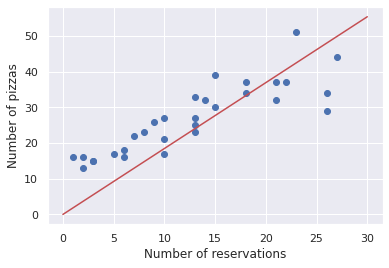

In [ ]:
y_line = w*x_line

plt.figure()
plt.scatter(X,Y)
plt.plot(x_line,y_line, 'r')
plt.xlabel('Number of reservations')
plt.ylabel('Number of pizzas')
plt.show()

Look at the chart we just plotted. Our line is not quite the best approximation of the examples, is it? The perfect line would have less slope, and it wouldn’t pass by the origin. Give or take, it would cross the “Pizzas” axis around the value of 10.

## Adding a Bias

So far, we forced the line to pass by the origin to keep our model as simple as we could. It’s time to remove that constraint. To draw a line that is not constrained to pass by the origin, we need one more parameter in our model:

$\hat{y} = w*x + b$

Remember we just saw this classic slope-intercept line equation: $y = mx + b$

Using the ML vocabulary we will call them:

* $w$ : weight
* $b$ : bias

Intuitively, the bias measures the “shift” of the line up or down the chart, as shown in the slide. The line crosses the $y$ axis at a value equal to $b$. If the bias happens to be 0, then we’re back at our previous case, with a
line passing by the origin.

Let's add the bias parameter $b$ to our training function...

In [ ]:
def predict(X, w, b):
  return X * w + b

In [ ]:
def loss(X, Y, w, b):
  return np.mean((predict(X, w, b) - Y ) **2)

In [ ]:
def train(X, Y, iterations, lr):
  w = 0
  b = 0 
  for i in range(iterations):
    current_loss = loss(X, Y, w, b)
    print(f'Iterations {i} => Loss (MSE): {current_loss:.6f} ')
    if loss(X, Y, w + lr, b) < current_loss:
      w += lr
    elif loss(X, Y, w - lr, b) < current_loss:
      w -= lr
    elif loss(X, Y, w , b + lr) < current_loss:
      b += lr
    elif loss(X, Y, w , b - lr) < current_loss:
      b -= lr
    else:
      print(f'Best w: {w}, Best b: {b}')
      return w, b
  raise Exception(f'Couldn\'t coverge within {iterations} iterations')

Let's use the new function!!! What do you think it will happen to the last loss function value???


In [ ]:
w, b = train(X, Y, iterations= 10000, lr = 0.01)

Iterations 0 => Loss (MSE): 812.866667 
Iterations 1 => Loss (MSE): 804.820547 
Iterations 2 => Loss (MSE): 796.818187 
Iterations 3 => Loss (MSE): 788.859587 
Iterations 4 => Loss (MSE): 780.944747 
Iterations 5 => Loss (MSE): 773.073667 
Iterations 6 => Loss (MSE): 765.246347 
Iterations 7 => Loss (MSE): 757.462787 
Iterations 8 => Loss (MSE): 749.722987 
Iterations 9 => Loss (MSE): 742.026947 
Iterations 10 => Loss (MSE): 734.374667 
Iterations 11 => Loss (MSE): 726.766147 
Iterations 12 => Loss (MSE): 719.201387 
Iterations 13 => Loss (MSE): 711.680387 
Iterations 14 => Loss (MSE): 704.203147 
Iterations 15 => Loss (MSE): 696.769667 
Iterations 16 => Loss (MSE): 689.379947 
Iterations 17 => Loss (MSE): 682.033987 
Iterations 18 => Loss (MSE): 674.731787 
Iterations 19 => Loss (MSE): 667.473347 
Iterations 20 => Loss (MSE): 660.258667 
Iterations 21 => Loss (MSE): 653.087747 
Iterations 22 => Loss (MSE): 645.960587 
Iterations 23 => Loss (MSE): 638.877187 
Iterations 24 => Loss (MSE

In [ ]:
print(f'Roberto will sell {w:.2f} times the number of reservations in pizzas. If he has 0 reservations, he will sell {b:.2f} pizzas.')

Roberto will sell 1.10 times the number of reservations in pizzas. If he has 0 reservations, he will sell 12.93 pizzas.


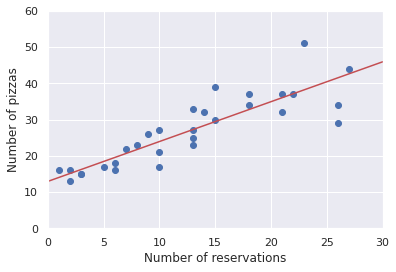

In [ ]:
y_line = w*x_line+b

plt.figure()
plt.scatter(X,Y)
plt.plot(x_line,y_line, 'r')
plt.xlim(0,30)
plt.ylim(0,60)
plt.xlabel('Number of reservations')
plt.ylabel('Number of pizzas')
plt.show()

Now we’re really talking! This line approximates the examples much better, and it crosses the y axis at a value equal to b. Even better, our final loss is lower than it used to be, which means that we’re more accurate than ever at forecasting pizza sales. Roberto will be delighted! 

# Summary

* A supervised learning system learns from examples composed of input variables and labels.
  * In our case, the input variables were the number of reservations, and the
labels were the number of pizzas.

* Supervised learning works by approximating the examples with a function, also called the model. 
  * In our first program, the model is a line identified by two parameters—the weight and the bias. 
  * This idea of approximating the examples with a line is called linear regression.

* The first phase of supervised learning is the `training phase`, when the system learn the parameters of the model to approximate the examples.
  * During this search, the system is guided by a `loss function` that measures the distance between the current model and the ground truth: the lower the loss, the better the model. 
  * Our program calculates the loss with a formula called the mean
squared error. 
  * The result of training are a weight and a bias—the ones that
result in the lowest loss that the system could find.

* The parameters found during the `training phase` are then used during the
second phase of supervised learning: the `prediction phase`. 
  * This phase passes an unlabeled input through the parametrized model. The result is a forecast / prediction / estimation, such as: “Tonight, you can expect to sell 42 pizzas.


Congratulations, you programmed your first supervised learning algorithm!!!